## Uniqueness of a record

- uniqueness = combination of the quasi-identifiers occurs only in this row  
- a row uniqueness means higher re-identification risk

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

create .csv files with uniqueness label for every dataset + distributions

In [2]:
def change_uniqueness_label(results, dataframe, attributes):
    for index1, row1 in results.iterrows():
        equal_rows = dataframe[
            (dataframe[attributes[0]] == row1[attributes[0]]) &
            (dataframe[attributes[1]] == row1[attributes[1]]) &
            (dataframe[attributes[2]] == row1[attributes[2]]) &
            (dataframe[attributes[3]] == row1[attributes[3]])
        ]
        for index2, row2 in equal_rows.iterrows():
            dataframe.at[index2, 'uniqueness'] = results.at[index1, 'count']
    return dataframe


def dataset_uniqueness(comp_dataset):
    if comp_dataset == 'diabetes_130':
        orig_df = pd.read_csv('./diabetes_130/diabetic_data.csv')
    elif comp_dataset == 'diabetes_012':
        orig_df = pd.read_csv('./diabetes_012/diabetes_012_cleaned.csv')
    elif comp_dataset == 'adult':
        orig_df = pd.read_csv('./adult/adult_cleaned.csv')

    sim_df_low = pd.read_csv('./'+comp_dataset+'/simulations/low.csv')
    sim_df_medium = pd.read_csv('./'+comp_dataset+'/simulations/medium.csv')
    sim_df_high = pd.read_csv('./'+comp_dataset+'/simulations/high.csv')
    sim_df_maximum = pd.read_csv('./'+comp_dataset+'/simulations/maximum.csv')
    sim_df_westin = pd.read_csv('./'+comp_dataset+'/simulations/westin.csv')
    sim_df_karampela = pd.read_csv('./'+comp_dataset+'/simulations/karampela.csv')

    dataframes = [orig_df, sim_df_low, sim_df_medium, sim_df_high, sim_df_maximum, sim_df_westin, sim_df_karampela]
    names = ['original', 'low', 'medium', 'high', 'maximum', 'westin', 'karampela']

    # demographic attributes depending on the data set 

    if comp_dataset == 'diabetes_130':
        attributes = ['age', 'weight', 'gender', 'race']
    elif comp_dataset == 'diabetes_012':
        attributes = ['Sex', 'Education', 'Age', 'Income']
    elif comp_dataset == 'adult':
        attributes = ['age', 'native-country', 'sex', 'relationship']
        
    for df, name in zip(dataframes, names):
        attributes_dataframe = df[attributes]
        result = attributes_dataframe.groupby([attributes[0], attributes[1], attributes[2], attributes[3]]).size().sort_values(ascending=False).reset_index(name='count')
        change_uniqueness_label(result, df, attributes)
        df.to_csv('./'+comp_dataset+'/uniqueness/'+name+'_uniqueness.csv', index=False)
    return dataframes

# dataset_uniqueness('diabetes_130')
# dataset_uniqueness('diabetes_012')
# dataset_uniqueness('adult')


read existing uniqueness results

In [3]:
names = ['original', 'low', 'medium', 'high', 'maximum', 'westin', 'karampela']

def read_uniqueness(comp_dataset):    
    if comp_dataset == 'diabetes_130':
        orig_df = pd.read_csv('diabetes_130/uniqueness/original_uniqueness.csv')
    elif comp_dataset == 'diabetes_012':
        orig_df = pd.read_csv('diabetes_012/uniqueness/original_uniqueness.csv')
    elif comp_dataset == 'adult':
        orig_df = pd.read_csv('adult/uniqueness/original_uniqueness.csv')

    sim_df_low = pd.read_csv(comp_dataset+'/uniqueness/low_uniqueness.csv')
    sim_df_medium = pd.read_csv(comp_dataset+'/uniqueness/medium_uniqueness.csv')
    sim_df_high = pd.read_csv(comp_dataset+'/uniqueness/high_uniqueness.csv')
    sim_df_maximum = pd.read_csv(comp_dataset+'/uniqueness/maximum_uniqueness.csv')
    sim_df_westin = pd.read_csv(comp_dataset+'/uniqueness/westin_uniqueness.csv')
    sim_df_karampela = pd.read_csv(comp_dataset+'/uniqueness/karampela_uniqueness.csv')

    dataframes = [orig_df, sim_df_low, sim_df_medium, sim_df_high, sim_df_maximum, sim_df_westin, sim_df_karampela]
    return dataframes
    # demographic attributes depending on the data set 
def read_attributes(comp_dataset):
    if comp_dataset == 'diabetes_130':
        attributes = ['age', 'weight', 'gender', 'race']
    elif comp_dataset == 'diabetes_012':
        attributes = ['Sex', 'Education', 'Age', 'Income']
    elif comp_dataset == 'adult':
        attributes = ['age', 'native-country', 'sex', 'relationship']
        
    return attributes

## Amount of unique records in every dataset + distributions

In [4]:
def add_rows(dfs, dataset_name, new_df):
    row = [dataset_name]
    for df in dfs:
        unique_rows = df.loc[df['uniqueness'] == 1]
        row.append(unique_rows.shape[0])
    new_df.loc[len(new_df)] = row

amount_unique_records = pd.DataFrame(pd.DataFrame(columns=['Dataset','Original', 'Low', 'Medium', 'High', 'Maximum', 'Westin', 'Karampela']))

add_rows(read_uniqueness('diabetes_130'), 'Diabetes Readmission', amount_unique_records)
add_rows(read_uniqueness('diabetes_012'), 'Diabetes Indicators', amount_unique_records)
add_rows(read_uniqueness('adult'), 'Adult', amount_unique_records)

print(amount_unique_records)

                Dataset  Original   Low  Medium  High  Maximum  Westin  \
0  Diabetes Readmission        73   153     156   159      101     159   
1   Diabetes Indicators        62   199     301   386      373     298   
2                 Adult      1720  2216    2277  1795      895    2362   

   Karampela  
0        157  
1        235  
2       2208  


## QID combinations

analysing similar rows

/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_38181/3210256549.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


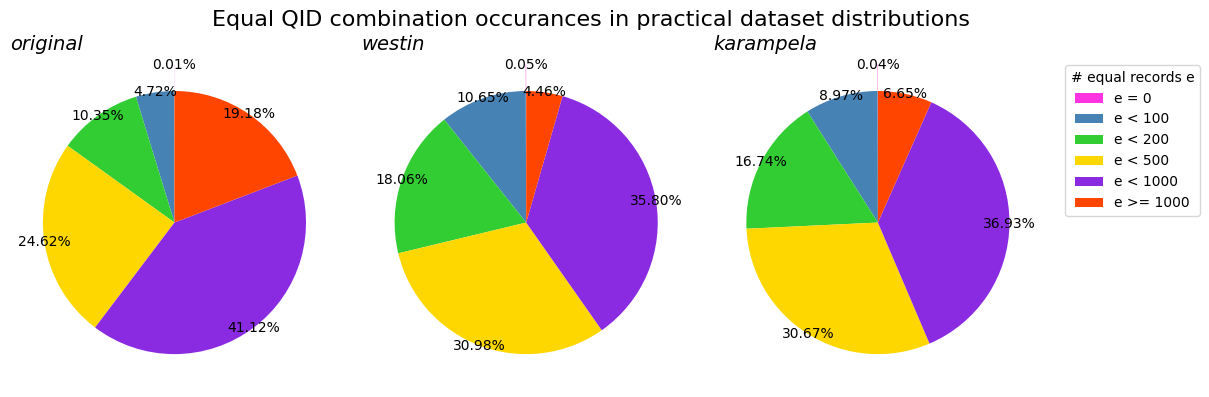

In [9]:
fig = plt.figure(figsize=(12, 4), layout='constrained')
ax_array = fig.subplots(1, 3, squeeze=False, sharey=False, sharex=False)
labels = ['e = 0', 'e < 100', 'e < 200', 'e < 500', 'e < 1000', 'e >= 1000']
remove_labels = ['', '', '', '', '', '']
explode = (0.2, 0, 0, 0, 0, 0)
datasets = read_uniqueness('diabetes_012')
trim_ds = [datasets[0], datasets[5], datasets[6]]
trim_names = ['original', 'westin', 'karampela']
colors = ["#FF33E0", "#4682B4", "#32CD32", "#FFD700", "#8A2BE2", "#FF4500"]
for df, name, ax in zip(trim_ds, trim_names, ax_array[0]):
    size = df.shape[0]
    a = df.loc[df['uniqueness'] == 1].shape[0]
    #b = df.loc[df['uniqueness'] < 50].shape[0]
    c = df.loc[df['uniqueness'] < 100].shape[0]
    d = df.loc[df['uniqueness'] < 200].shape[0]
    e = df.loc[df['uniqueness'] < 500].shape[0]
    f = df.loc[df['uniqueness'] < 1000].shape[0]
    g = df.loc[df['uniqueness'] >= 1000].shape[0]
    percentages = [a/size*100, c/size*100, d/size*100, e/size*100, f/size*100, g/size*100]
    #  wedgeprops=dict(width=0.5),
    ax.pie([a, c, d, e, f, g], labels=remove_labels, autopct='%0.2f%%', startangle=90, explode=explode, pctdistance=1, colors=colors)
    ax.set_title(name, loc='left', fontstyle='oblique', fontsize=14)

plt.legend(labels, loc='upper right', bbox_to_anchor=(1.5, 1), title = '# equal records e', fontsize=10)
fig.suptitle('Equal QID combination occurances in practical dataset distributions', fontsize=16)
plt.tight_layout()
plt.show()

Most frequent QID combination

In [10]:
attributes = read_attributes('diabetes_012')
datasets = read_uniqueness('diabetes_012')
for df, name in zip(datasets, names):
    highest = df.groupby(attributes)['uniqueness'].size().idxmax()
    amount = df.groupby(['uniqueness']).size().max()
    print(name, highest, amount)

original ('female', 'college graduate', '55-59', '>= $75,000') 4161
low ('female', 'college graduate', '55-59', '>= $75,000') 3128
medium ('?', 'college graduate', '[30-60)', '>= $75,000') 2196
high ('female', 'graduated high school', '[60-100)', '< $50,000 ') 2577
maximum ('?', 'graduated high school', '[60-100)', '< $50,000 ') 5218
westin ('?', 'college graduate', '[30-60)', '>= $75,000') 2252
karampela ('female', 'college graduate', '40-44', '>= $75,000') 2477


## Marketer Risk

- https://journalprivacyconfidentiality.org/index.php/jpc/article/view/636/619

$D R_{Mark} = |\{ a^M \in D^M: P_s(a^M) = 1.0\}| / n$

KeyboardInterrupt: 

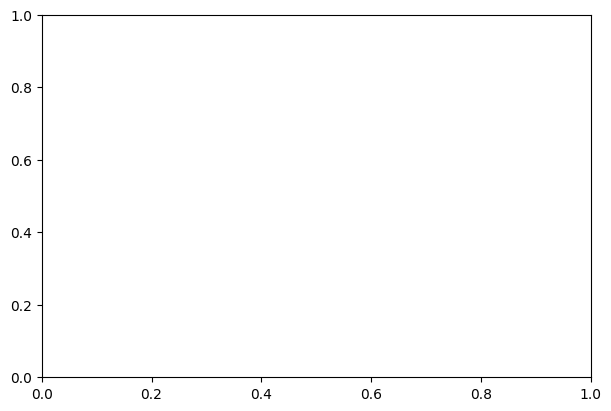

In [7]:
def marketer_risk(dataframe):
    unique_rows = dataframe.loc[dataframe['uniqueness'] == 1]
    return unique_rows.shape[0]/dataframe.shape[0]

def compare_marketer_risk(dataframes):
    marketer_risk_values = []
    for df in dataframes:
        marketer_risk_values.append(marketer_risk(df))
    return marketer_risk_values


fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)

marketer_risk_df = pd.DataFrame({
    'simulations strictness': ['original', 'low', 'medium', 'high', 'maximum', 'westin', 'karampela'],
    'Diabetes Readmission': compare_marketer_risk(read_uniqueness('diabetes_130')),
    'Diabetes Indicators': compare_marketer_risk(read_uniqueness('diabetes_012')),
    'Adult': compare_marketer_risk(read_uniqueness('adult'))
})

marketer_risk_df.plot(kind='bar', x='simulations strictness', ax=ax, stacked=False, xlabel='')
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.yaxis.set_minor_locator(AutoMinorLocator())
fig.suptitle('Marketer Risk of different distribution results for all datasets', fontsize='large')
fig.supxlabel('Distributions',fontsize='medium')
fig.supylabel('Marketer Risk',fontsize='medium') 
plt.xticks(rotation=0)
plt.legend(fontsize='small', loc = 'upper right')
plt.show()
